In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('./data_zx/prediction_data_normal.json', 'r') as f:
    pred = json.load(f)

In [3]:
for i, idx in enumerate(pred):
    for j in range(4):
        pred[idx]['cite_%d'%(2014+j)] = pred[idx]['cite'][j]
        pred[idx]['kw_mean_%d'%(2014+j)] = pred[idx]['kw_mean'][j]
        pred[idx]['author_score_%d'%(2014+j)] = pred[idx]['author_score'][j]
    del pred[idx]['cite']
    del pred[idx]['kw_mean']
    del pred[idx]['author_score']
    if i % 1_000_000 == 0:
        print(i)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000


In [8]:
for i, idx in enumerate(pred):
    print(pred[idx])
    if i > 3:
        break

{'cite_2014': 12, 'kw_mean_2014': 29040.222222222223, 'author_score_2014': 1.0162432414641644, 'cite_2015': 3, 'kw_mean_2015': 28599.444444444445, 'author_score_2015': 0.9934141887023189, 'cite_2016': 4, 'kw_mean_2016': 22924.88888888889, 'author_score_2016': 0.37411916711921805, 'cite_2017': 0, 'kw_mean_2017': 5704.444444444444, 'author_score_2017': 0.5900868895320555, 'cite_2017_predi': 0}
{'cite_2014': 0, 'kw_mean_2014': 63007.5, 'author_score_2014': -0.2192276383151145, 'cite_2015': 0, 'kw_mean_2015': 62395.5, 'author_score_2015': -0.2817034355560821, 'cite_2016': 0, 'kw_mean_2016': 50758.5, 'author_score_2016': -0.22305333874067942, 'cite_2017': 0, 'kw_mean_2017': 12445.5, 'author_score_2017': -0.09232853196101516, 'cite_2017_predi': 0}
{'cite_2014': 0, 'kw_mean_2014': 37642.28571428572, 'author_score_2014': 0.17501728737653768, 'cite_2015': 0, 'kw_mean_2015': 37914.57142857143, 'author_score_2015': -0.2817034355560821, 'cite_2016': 0, 'kw_mean_2016': 33353.857142857145, 'author_s

In [84]:
cnt = 0
for i in pred.keys():
    if pred[i]['cite_2014']+pred[i]['cite_2015']+pred[i]['cite_2016']+pred[i]['cite_2017'] > 100:
        print(pred[i], i)
        cnt+=1
    if cnt > 5:
        break

{'cite_2014': 48, 'kw_mean_2014': 23086.333333333332, 'author_score_2014': 1.3511861685310278, 'cite_2015': 45, 'kw_mean_2015': 23044.666666666668, 'author_score_2015': 0.412412976958436, 'cite_2016': 41, 'kw_mean_2016': 20446.25, 'author_score_2016': -0.14502271349954685, 'cite_2017': 20, 'kw_mean_2017': 9080.416666666666, 'author_score_2017': 0.011037513563218476, 'cite_2017_predi': 0} 36
{'cite_2014': 25, 'kw_mean_2014': 33308.5, 'author_score_2014': -0.08045300011114784, 'cite_2015': 35, 'kw_mean_2015': 33237.125, 'author_score_2015': -0.022557850930107076, 'cite_2016': 31, 'kw_mean_2016': 29700.25, 'author_score_2016': -0.03193085013961058, 'cite_2017': 20, 'kw_mean_2017': 12693.0, 'author_score_2017': -0.05784047095159591, 'cite_2017_predi': 0} 344
{'cite_2014': 56, 'kw_mean_2014': 16366.142857142857, 'author_score_2014': -0.05737829317707273, 'cite_2015': 48, 'kw_mean_2015': 16598.714285714286, 'author_score_2015': 0.12480035441196048, 'cite_2016': 40, 'kw_mean_2016': 14444.7142

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
import seaborn as sns

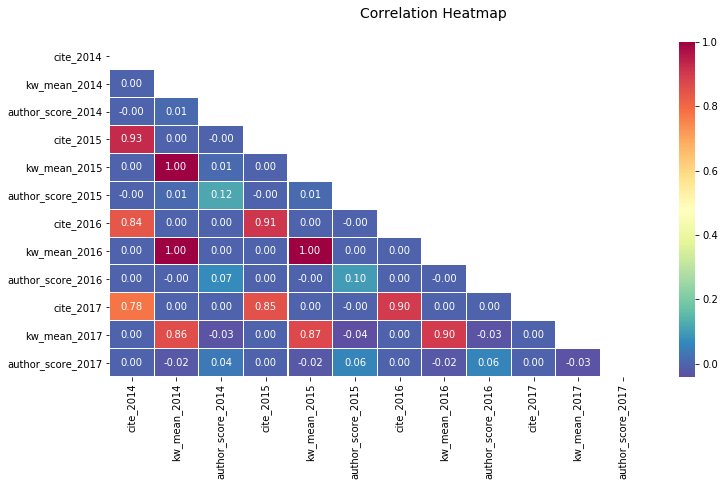

In [116]:
fig, ax = plt.subplots(figsize=(12, 6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(round(corr, 2), mask = mask, annot = True, ax = ax, fmt = '.2f', linewidths=.05, cmap = 'Spectral_r')
fig.subplots_adjust(top = 0.9)
t = fig.suptitle('Correlation Heatmap', fontsize = 14)

In [126]:
list_5 = []
for i, idx in enumerate(pred):
    if i==36 or i==344 or i==798 or i==3164 or i==3920:
        list_5.append(pred[idx])
    if i > 3930:
        break

In [127]:
list_5

[{'author_score_2014': 1.3511861685310278,
  'author_score_2015': 0.412412976958436,
  'author_score_2016': -0.14502271349954685,
  'author_score_2017': 0.011037513563218476,
  'cite_2014': 48,
  'cite_2015': 45,
  'cite_2016': 41,
  'cite_2017': 20,
  'cite_2017_predi': 0,
  'kw_mean_2014': 23086.333333333332,
  'kw_mean_2015': 23044.666666666668,
  'kw_mean_2016': 20446.25,
  'kw_mean_2017': 9080.416666666666},
 {'author_score_2014': -0.08045300011114784,
  'author_score_2015': -0.022557850930107076,
  'author_score_2016': -0.03193085013961058,
  'author_score_2017': -0.05784047095159591,
  'cite_2014': 25,
  'cite_2015': 35,
  'cite_2016': 31,
  'cite_2017': 20,
  'cite_2017_predi': 0,
  'kw_mean_2014': 33308.5,
  'kw_mean_2015': 33237.125,
  'kw_mean_2016': 29700.25,
  'kw_mean_2017': 12693.0},
 {'author_score_2014': -0.05737829317707273,
  'author_score_2015': 0.12480035441196048,
  'author_score_2016': 0.27034640436477225,
  'author_score_2017': 0.013285199110697463,
  'cite_2014

In [128]:
dic_5 = dict((idx, {}) for idx in [36, 344, 798, 3164, 3920])
for i, idx in enumerate(dic_5):
    dic_5[idx] = list_5[i]

In [129]:
dic_5

{36: {'author_score_2014': 1.3511861685310278,
  'author_score_2015': 0.412412976958436,
  'author_score_2016': -0.14502271349954685,
  'author_score_2017': 0.011037513563218476,
  'cite_2014': 48,
  'cite_2015': 45,
  'cite_2016': 41,
  'cite_2017': 20,
  'cite_2017_predi': 0,
  'kw_mean_2014': 23086.333333333332,
  'kw_mean_2015': 23044.666666666668,
  'kw_mean_2016': 20446.25,
  'kw_mean_2017': 9080.416666666666},
 344: {'author_score_2014': -0.08045300011114784,
  'author_score_2015': -0.022557850930107076,
  'author_score_2016': -0.03193085013961058,
  'author_score_2017': -0.05784047095159591,
  'cite_2014': 25,
  'cite_2015': 35,
  'cite_2016': 31,
  'cite_2017': 20,
  'cite_2017_predi': 0,
  'kw_mean_2014': 33308.5,
  'kw_mean_2015': 33237.125,
  'kw_mean_2016': 29700.25,
  'kw_mean_2017': 12693.0},
 798: {'author_score_2014': -0.05737829317707273,
  'author_score_2015': 0.12480035441196048,
  'author_score_2016': 0.27034640436477225,
  'author_score_2017': 0.013285199110697463

In [130]:
df_5 = pd.DataFrame.from_dict(dic_5, orient='index')
df_5.index.rename('nid', inplace=True)

In [133]:
df_5 = df_5.loc[:, ['cite_2014', 'cite_2015', 'cite_2016', 'cite_2017']]
df_5

,cite_2014,cite_2015,cite_2016,cite_2017
nid,,,,
36,48,45,41,20
344,25,35,31,20
798,56,48,40,36
3164,29,38,39,14
3920,67,45,42,10


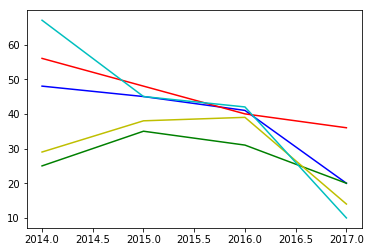

In [138]:
x = range(2014, 2018)
color = ['b', 'g', 'r', 'y', 'c']
cnt = 0
for idx, row in df_5.iterrows():
    y = [row['cite_2014'], row['cite_2015'], row['cite_2016'], row['cite_2017']]
    print()
    plt.plot(x, y, color[cnt])
    cnt += 1
plt.show()

In [16]:
df = pd.DataFrame.from_dict(pred, orient='index').sort_index()

In [23]:
df.shape

(11763494, 13)

In [31]:
df.index = df.index.astype(int)

In [32]:
df.sort_index(inplace = True)
df.head()

,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
nid,,,,,,,,,,,,,
0,12,29040.222222,1.016243,3,28599.444444,0.993414,4,22924.888889,0.374119,0,5704.444444,0.590087,0
1,0,63007.500000,-0.219228,0,62395.500000,-0.281703,0,50758.500000,-0.223053,0,12445.500000,-0.092329,0
2,0,37642.285714,0.175017,0,37914.571429,-0.281703,0,33353.857143,0.480454,0,14270.142857,-0.092329,0
3,1,26045.636364,0.374668,0,26330.909091,-0.204240,0,21744.090909,0.238670,0,5644.272727,0.150741,0
4,0,27728.200000,-0.170044,0,27791.800000,-0.173639,0,24303.000000,-0.209063,0,10460.600000,-0.074425,0


In [34]:
df_test = df.loc[:10000]
df_test.head()

,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
nid,,,,,,,,,,,,,
0,12,29040.222222,1.016243,3,28599.444444,0.993414,4,22924.888889,0.374119,0,5704.444444,0.590087,0
1,0,63007.500000,-0.219228,0,62395.500000,-0.281703,0,50758.500000,-0.223053,0,12445.500000,-0.092329,0
2,0,37642.285714,0.175017,0,37914.571429,-0.281703,0,33353.857143,0.480454,0,14270.142857,-0.092329,0
3,1,26045.636364,0.374668,0,26330.909091,-0.204240,0,21744.090909,0.238670,0,5644.272727,0.150741,0
4,0,27728.200000,-0.170044,0,27791.800000,-0.173639,0,24303.000000,-0.209063,0,10460.600000,-0.074425,0


In [35]:
features = ['cite_2014', 'kw_mean_2014', 'author_score_2014', 'cite_2015', 'kw_mean_2015', 'author_score_2015','cite_2016', 'kw_mean_2016', 'author_score_2016']
X = df[features].values
y = df['cite_2017'].values

In [36]:
X.shape, y.shape

((11763494, 9), (11763494,))

In [41]:
for col in df.columns:
    print(col, df[col].isnull().sum())

cite_2014 0
kw_mean_2014 0
author_score_2014 0
cite_2015 0
kw_mean_2015 0
author_score_2015 0
cite_2016 0
kw_mean_2016 0
author_score_2016 0
cite_2017 0
kw_mean_2017 0
author_score_2017 0
cite_2017_predi 0


In [42]:
df.corr()

,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
cite_2014,1.000000,0.000410,-0.000024,0.933277,0.000407,-0.000368,0.843376,0.000389,0.000816,0.783988,0.000239,0.000105,NaN
kw_mean_2014,0.000410,1.000000,0.008122,0.000363,0.999699,0.009958,0.000379,0.995860,-0.000359,0.000340,0.864915,-0.019134,NaN
author_score_2014,-0.000024,0.008122,1.000000,-0.000041,0.007380,0.116747,0.000007,0.002780,0.066047,0.000113,-0.030232,0.037842,NaN
cite_2015,0.933277,0.000363,-0.000041,1.000000,0.000360,-0.000337,0.914341,0.000344,0.000747,0.852208,0.000239,0.000152,NaN
kw_mean_2015,0.000407,0.999699,0.007380,0.000360,1.000000,0.009392,0.000380,0.996597,-0.000859,0.000342,0.869425,-0.019360,NaN
author_score_2015,-0.000368,0.009958,0.116747,-0.000337,0.009392,1.000000,-0.000423,0.003887,0.102770,-0.000313,-0.035117,0.055419,NaN
cite_2016,0.843376,0.000379,0.000007,0.914341,0.000380,-0.000423,1.000000,0.000373,0.000700,0.896246,0.000329,0.000155,NaN
kw_mean_2016,0.000389,0.995860,0.002780,0.000344,0.996597,0.003887,0.000373,1.000000,-0.003874,0.000340,0.900966,-0.020272,NaN
author_score_2016,0.000816,-0.000359,0.066047,0.000747,-0.000859,0.102770,0.000700,-0.003874,1.000000,0.000904,-0.031082,0.059001,NaN
cite_2017,0.783988,0.000340,0.000113,0.852208,0.000342,-0.000313,0.896246,0.000340,0.000904,1.000000,0.000304,0.000207,NaN


In [43]:
from sklearn.linear_model import LinearRegression

In [50]:
y = df['cite_2017'].values

In [51]:
y = np.array([y]).T
X = df.loc[:, 'cite_2014': 'author_score_2016'].as_matrix(columns = None)

In [52]:
l = LinearRegression()
l.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
l.coef_

array([[ -1.43752127e-02,  -2.04349999e-07,   1.68667775e-04,
          9.70505285e-02,   1.45265902e-07,   3.74739990e-05,
          3.07004249e-01,   6.88951508e-08,   4.64216678e-04]])

In [80]:
features = ['cite_2014', 'kw_mean_2014', 'author_score_2014', 'cite_2015', 'kw_mean_2015', 'author_score_2015','cite_2016', 'kw_mean_2016', 'author_score_2016']
df_test['cite_2017_predi'] = l.predict(df_test.loc[:, features])
df_test.head(10)

/home/sherlockshaw1024/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
nid,,,,,,,,,,,,,
0,12,29040.222222,1.016243,3,28599.444444,0.993414,4,22924.888889,0.374119,0,5704.444444,0.590087,1.377743
1,0,63007.500000,-0.219228,0,62395.500000,-0.281703,0,50758.500000,-0.223053,0,12445.500000,-0.092329,0.030429
2,0,37642.285714,0.175017,0,37914.571429,-0.281703,0,33353.857143,0.480454,0,14270.142857,-0.092329,0.031250
3,1,26045.636364,0.374668,0,26330.909091,-0.204240,0,21744.090909,0.238670,0,5644.272727,0.150741,0.016687
4,0,27728.200000,-0.170044,0,27791.800000,-0.173639,0,24303.000000,-0.209063,0,10460.600000,-0.074425,0.030808
5,0,34501.000000,-0.097567,0,34586.875000,-0.119934,0,30246.250000,-0.156624,0,13025.375000,-0.039841,0.030859
6,0,27307.500000,3.511428,0,27289.916667,1.399219,0,22731.333333,0.508316,0,5729.333333,0.160127,0.031726
7,2,36977.285714,1.897462,6,36729.285714,0.429644,6,32788.142857,-0.008909,7,14339.571429,0.287908,2.426843
8,0,30223.333333,-0.188415,0,30553.000000,-0.231822,0,26876.166667,-0.116496,0,11960.833333,-0.092329,0.030914


In [59]:
print(l.predict([[12, 29040.222222, 1.016243, 3, 28599.444444, 0.993414, 4, 22924.888889, 0.374119]]))

[[ 1.37774274]]


In [72]:
df_test.head(10)

,cite_2014,kw_mean_2014,author_score_2014,cite_2015,kw_mean_2015,author_score_2015,cite_2016,kw_mean_2016,author_score_2016,cite_2017,kw_mean_2017,author_score_2017,cite_2017_predi
nid,,,,,,,,,,,,,
0,12,29040.222222,1.016243,3,28599.444444,0.993414,4,22924.888889,0.374119,0,5704.444444,0.590087,2819.403388
1,0,63007.500000,-0.219228,0,62395.500000,-0.281703,0,50758.500000,-0.223053,0,12445.500000,-0.092329,6116.785851
2,0,37642.285714,0.175017,0,37914.571429,-0.281703,0,33353.857143,0.480454,0,14270.142857,-0.092329,3654.543982
3,1,26045.636364,0.374668,0,26330.909091,-0.204240,0,21744.090909,0.238670,0,5644.272727,0.150741,2528.693093
4,0,27728.200000,-0.170044,0,27791.800000,-0.173639,0,24303.000000,-0.209063,0,10460.600000,-0.074425,2691.929826
5,0,34501.000000,-0.097567,0,34586.875000,-0.119934,0,30246.250000,-0.156624,0,13025.375000,-0.039841,3349.479625
6,0,27307.500000,3.511428,0,27289.916667,1.399219,0,22731.333333,0.508316,0,5729.333333,0.160127,2652.172260
7,2,36977.285714,1.897462,6,36729.285714,0.429644,6,32788.142857,-0.008909,7,14339.571429,0.287908,3590.484840
8,0,30223.333333,-0.188415,0,30553.000000,-0.231822,0,26876.166667,-0.116496,0,11960.833333,-0.092329,2934.175066


In [74]:
dic_test = df_test.to_dict(orient='index')

In [75]:
for i, idx in enumerate(dic_test):
    row = dic_test[idx]
    row['cite_2017_predi'] = l.predict([[row['cite_2014'], row['cite_2015'], row['cite_2016'], row['kw_mean_2014'],row['kw_mean_2015'],row['kw_mean_2016'], row['author_score_2014'], row['author_score_2015'], row['author_score_2016']]])[0][0]
    

In [76]:
for i, idx in enumerate(dic_test):
    print(dic_test[idx])
    if i > 5:
        break

{'cite_2014': 12.0, 'kw_mean_2014': 29040.222222222223, 'author_score_2014': 1.0162432414641644, 'cite_2015': 3.0, 'kw_mean_2015': 28599.444444444445, 'author_score_2015': 0.9934141887023189, 'cite_2016': 4.0, 'kw_mean_2016': 22924.888888888891, 'author_score_2016': 0.37411916711921805, 'cite_2017': 0.0, 'kw_mean_2017': 5704.4444444444443, 'author_score_2017': 0.59008688953205546, 'cite_2017_predi': 2819.4033878732766}
{'cite_2014': 0.0, 'kw_mean_2014': 63007.5, 'author_score_2014': -0.21922763831511449, 'cite_2015': 0.0, 'kw_mean_2015': 62395.5, 'author_score_2015': -0.28170343555608213, 'cite_2016': 0.0, 'kw_mean_2016': 50758.5, 'author_score_2016': -0.22305333874067942, 'cite_2017': 0.0, 'kw_mean_2017': 12445.5, 'author_score_2017': -0.092328531961015162, 'cite_2017_predi': 6116.7858511094937}
{'cite_2014': 0.0, 'kw_mean_2014': 37642.285714285717, 'author_score_2014': 0.17501728737653768, 'cite_2015': 0.0, 'kw_mean_2015': 37914.571428571428, 'author_score_2015': -0.28170343555608213

In [81]:
df_test.to_csv('./data_zx/perdi_result_1w.csv')